<a href="https://colab.research.google.com/github/donskerclass/ComputationalMethodsClass/blob/main/Python/ODEExamplesPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Equations in Python

Here are some examples to get you started with solving (ordinary) differential equations (ODEs) in Python using scipy. For  more info, see the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/integrate.html#solving-initial-value-problems-for-ode-systems).

In [1]:
#Libraries for math, differential equations, and plotting
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Let's solve our first differential equation: to begin with, something where we know the answer: a univariate linear ODE with constant coefficients:
$$\frac{dy}{dt}=f(t,y)=a\cdot y$$
With the growth rate alone, we have a family of solutions. To pin down a solution uniquely, we need one more condition, the initial value:
$$y(0)=y_0$$
Together, these two define an initial value problem, and can be solved over for the value of u at any time. For a numerical solution solved iteratively, we must declare a time span $t\in [0,T]$

In [2]:
#Declare the growth rate as a function of current value u, parameters p, and time t
def f(t,y): return 0.05*y #Grow at a rate of 5% per unit of time
#Declare the initial condition
y0 = [1.0]
#Declare the time span
T=4.0 
tspan=[0, T]

Now use `solve_ivp` to  This will use the default solver, which is a 4th order Runge-Kutta method (`RK45`), with automatically chosen grid points.

In [3]:
sol = solve_ivp(f,tspan,y0)

In [4]:
print(sol.t) #Evaluation points
print(sol.y) #Solution values

[0.         0.18209282 2.00302099 4.        ]
[[1.         1.00914621 1.10533787 1.22140276]]


If points are desired between grid points, use option `dense_output=True` to return a callable object (function), with intermediate values calculated by interpolation.

In [5]:
sol_dens = solve_ivp(f,tspan,y0,dense_output=True)
print(sol_dens.sol(2.0)) #evaluate at a point
print(sol_dens.sol(3.1)) #evaluate at a point

[1.10517092]
[1.16765796]


Because this is an equation where we know the true solution, we can compare and see how accurate the solver was.
Recall that for a linear ODE, the true solution is
$$y(t)=y_0\cdot e^{at}$$

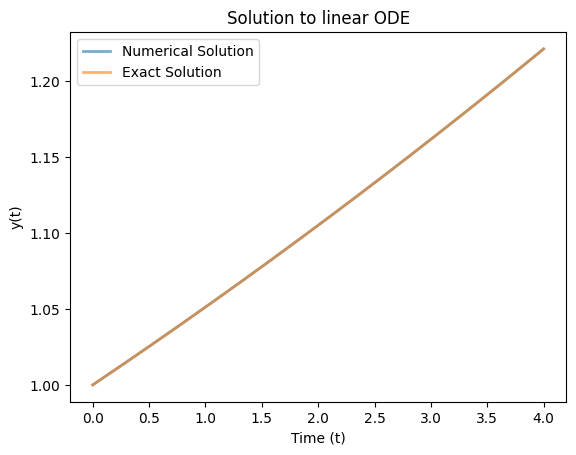

In [6]:
#Plot the numerical and true solution over the domain
t = np.linspace(0, T, 300)
numsol = sol_dens.sol(t) #Numerical solution
exactsol = y0*np.exp(0.05 * t) #exact solution

fig, ax = plt.subplots()
ax.plot(t, numsol.T, linewidth=2, alpha=0.6, label='Numerical Solution')
ax.plot(t, exactsol, linewidth=2, alpha=0.6, label='Exact Solution')
ax.legend()
plt.title('Solution to linear ODE')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.show()

That looks pretty good, but this was an easy problem. Iterative solvers using an explicit time step can often do very poorly if the growth rate between time steps is large (in multivariate cases, when the Jacobian of the function f is ill-conditioned), requiring very tiny time steps to get good accuracy, which makes the procedure slow and unstable. Such problems are often called **stiff** ODEs, and one tends to get a better solution using an implicit method. Let's illustrate this in the linear case and see how much difference the method makes.

In [7]:
#New problem with huge growth rate
def f2(t,y): return 100*y #Grow 100 times per period
tspan2 = [0.0, 1.0] #We will see fast growth even in a short period
stiffsol = solve_ivp(f2,tspan2,y0,dense_output=True) #Solve problem same as before except for growth rate and span
stiffsol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.951e-01  1.000e+00]
        y: [[ 1.000e+00  2.718e+00 ...  1.629e+43  2.667e+43]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f7a358052e0>
 t_events: None
 y_events: None
     nfev: 434
     njev: 0
      nlu: 0

In [8]:
print(stiffsol.t) #Evaluation points
print(stiffsol.y) #Solution values

[0.         0.01       0.02250556 0.03596406 0.04980587 0.06380522
 0.0778699  0.09196175 0.10606494 0.12017285 0.13428274 0.14839344
 0.16250449 0.17661568 0.19072693 0.20483821 0.21894949 0.23306079
 0.24717208 0.26128337 0.27539467 0.28950596 0.30361725 0.31772855
 0.33183984 0.34595114 0.36006243 0.37417372 0.38828502 0.40239631
 0.41650761 0.4306189  0.44473019 0.45884149 0.47295278 0.48706408
 0.50117537 0.51528666 0.52939796 0.54350925 0.55762055 0.57173184
 0.58584313 0.59995443 0.61406572 0.62817702 0.64228831 0.65639961
 0.6705109  0.68462219 0.69873349 0.71284478 0.72695608 0.74106737
 0.75517866 0.76928996 0.78340125 0.79751255 0.81162384 0.82573513
 0.83984643 0.85395772 0.86806902 0.88218031 0.8962916  0.9104029
 0.92451419 0.93862549 0.95273678 0.96684807 0.98095937 0.99507066
 1.        ]
[[1.00000000e+00 2.71833333e+00 9.49303327e+00 3.64646560e+01
  1.45537114e+02 5.90081008e+02 2.40815196e+03 9.85452308e+03
  4.03718735e+04 1.65473024e+05 6.78361232e+05 2.78118909e+0

That needed many more evaluation grid points to reach a decent measure of accuracy. Trying with an even larger growth rate or longer span would lead to numbers too large relative to handle in floating point.  Let's see if it led to a good solution at least by plotting against the true value.

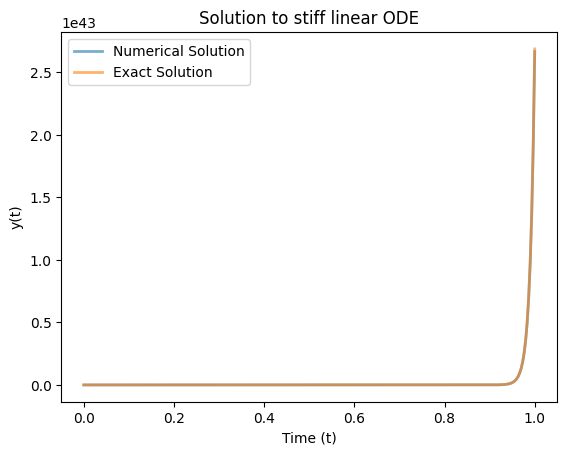

In [9]:
#Plot the numerical and true solution over the domain
t = np.linspace(0, 1.0, 300)
numsol = stiffsol.sol(t) #Numerical solution
exactsol = y0*np.exp(100 * t) #exact solution

fig, ax = plt.subplots()
ax.plot(t, numsol.T, linewidth=2, alpha=0.6, label='Numerical Solution')
ax.plot(t, exactsol, linewidth=2, alpha=0.6, label='Exact Solution')
ax.legend()
plt.title('Solution to stiff linear ODE')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.show()

That looks mostly reasonable, by visual inspection. Now compare to numerical values, especially at the end, as errors build up over steps.

In [10]:
abserr = np.abs(stiffsol.sol(1.0)-np.exp(100.0))
relerr = abserr/np.exp(100.0)
print(abserr)
print(relerr)

[2.12963768e+41]
[0.00792241]


That's so-so performance: we are about 0.8 percent off. Now let's see if an implicit method can do better, either in speed or accuracy. In `ode_int`, you can declare a solver explicitly, out of a few options: see [the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) for discussion. Stiff solvers available, which use implicit methods, include 'Radau' or 'BDF', as well as a method that detects stiffness and uses a solver appropriate to the problem.

In [11]:
stiffsol2 = solve_ivp(f2,tspan2,y0,dense_output=True,method='Radau') #Solve problem same as before except for implicit solver
stiffsol2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.625e-03 ...  9.956e-01  1.000e+00]
        y: [[ 1.000e+00  1.755e+00 ...  1.732e+43  2.690e+43]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f7a35672fd0>
 t_events: None
 y_events: None
     nfev: 1257
     njev: 2
      nlu: 2

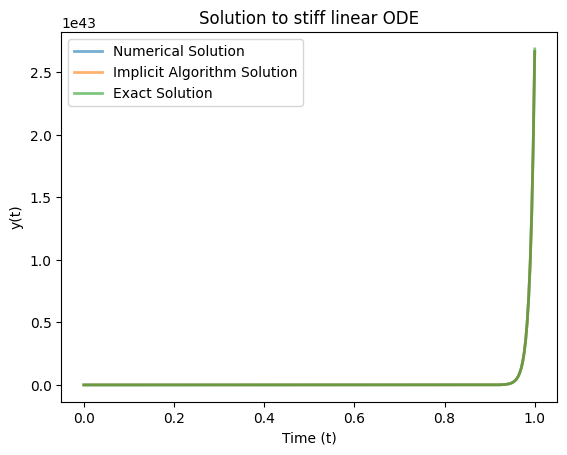

In [12]:
#Plot results, on same plot
numsol2 = stiffsol2.sol(t) #Numerical solution

fig, ax = plt.subplots()
ax.plot(t, numsol.T, linewidth=2, alpha=0.6, label='Numerical Solution')
ax.plot(t, numsol.T, linewidth=2, alpha=0.6, label='Implicit Algorithm Solution')
ax.plot(t, exactsol, linewidth=2, alpha=0.6, label='Exact Solution')
ax.legend()
plt.title('Solution to stiff linear ODE')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.show()

In [13]:
#Measure Results at the end
abserr2 = np.abs(stiffsol2.sol(1.0)-np.exp(100.0))
relerr2 = abserr2/np.exp(100.0)
print(abserr2)
print(relerr2)

[2.37420929e+40]
[0.00088322]


That gave us about an order of magnitude relative accuracy improvement, though total cost may not have been comparable due to additional operations required by the implicit solver. Careful, problem-specific benchmarking would be needed to know which is the more desirable method for your application.

## 빛이 나는 Solow

One of the most basic models in economics with representation as an initial value problem is the classic Solow Growth Model, which describes the process of capital accumulation and growth for a country with fixed savings rate $s$, decreasing returns to scale technology $f(k)=Ak^{\alpha}$, and initial capital $k_0$ and depreciation rate $\delta$.  In this simple model, the capital stock of the country can be defined by the ODE
$$\dot{k}=s\cdot (Ak^{\alpha}-\delta k)$$
$$k(0)=k_0$$
Let's set this up as a parameterized function and solve.

In [14]:
def solow(t, y, s = 0.08, A = 1.0, alpha = 1.0/3, delta = 0.03):
    return s * (A * y**alpha - delta * y)

In [15]:
#Set some typical parameter values
A = 1.0   #A normalization
alpha = 1.0/3 #Nicolas Kaldor presented empirical evidence that this is a constant, though more recent work disputes that
delta = 0.03  #Substantial disputes exist about this number 
# See http://www.econ.yale.edu//smith/piketty1.pdf for discussion of its implications, from one side of an acrimonious debate
# One sentence summary: if δ=0, accumulation is unbounded, if δ>0, it stops eventually. 
# Piketty (2014) (implicitly) used the δ=0 model, and later argued it is very small. 
# Krusell and Smith in their working paper version suggested δ≈0.05, for which they were called dishonest idiots by Brad DeLong...
s = 0.08 # This fluctuates: see https://fred.stlouisfed.org/series/PSAVERT for US data
# For countries like China (and, during their fast growth periods, Korea and Japan), this number is a lot higher 

args = (s, A, alpha, delta)
# Initial values
k0 = [20.0] #Start with a low wealth country
tspan = [0.0, 2000.0]

In [16]:
growthpath = solve_ivp(solow,tspan,k0,args=args,dense_output=True)

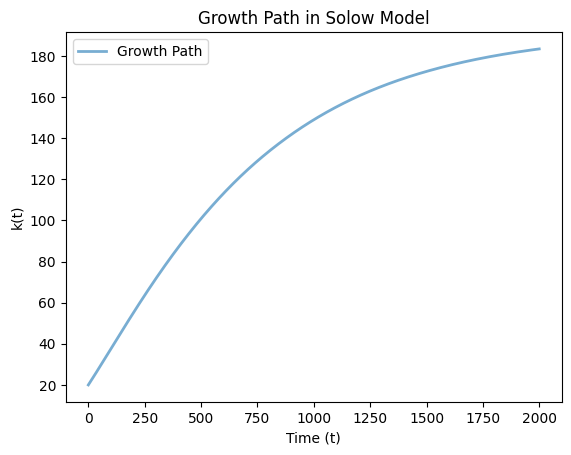

In [17]:
#Plot the growth path
t = np.linspace(0, 2000, 800)
solpath = growthpath.sol(t) 

fig, ax = plt.subplots()
ax.plot(t, solpath.T, linewidth=2, alpha=0.6, label='Growth Path')
ax.legend()
plt.title('Growth Path in Solow Model')
plt.xlabel('Time (t)')
plt.ylabel('k(t)')
plt.show()

We can see why depreciation matters by noting that capital accumulation stops, $\dot{k}=0$ whenever $Ak^{\alpha}-\delta k =0$.

In [18]:
kstar = (A/delta)**(1/(1-alpha)) #Point at which growth no longer occurs
print(kstar)

192.45008972987512


Note that it is not a function of $s$. However, s can make the path of getting to steady state faster.

In [19]:
s2 = 0.4 #High growth country rate
args2 = (s2, A, alpha, delta) #Change just the savings rate

fastgrower = solve_ivp(solow,tspan,k0,args=args2,dense_output=True)
fastgrower

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.883e-01 ...  1.748e+03  2.000e+03]
        y: [[ 2.000e+01  2.016e+01 ...  1.924e+02  1.924e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f7a35619910>
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0

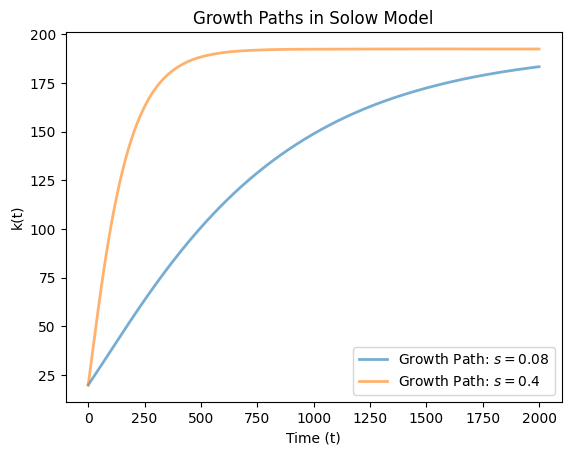

In [20]:
fastpath = fastgrower.sol(t)
fig, ax = plt.subplots()
ax.plot(t, solpath.T, linewidth=2, alpha=0.6, label=f'Growth Path: $s={s}$')
ax.plot(t, fastpath.T, linewidth=2, alpha=0.6, label=f'Growth Path: $s={s2}$')
ax.legend()
plt.title('Growth Paths in Solow Model')
plt.xlabel('Time (t)')
plt.ylabel('k(t)')
plt.show()

This logic, showing the country with the higher savings rate reaches its steady state much earlier, has been used to argue that higher growth rates in East Asia in the late 20th century may be partially explained by their higher savings.

## Yes, SIR

To illustrate mulitvariate differential equations, we can try the classic epidemiological model of Kermack and McKendrick (1927), the SIR model, standing for the three groups in relation to a disease, the Susceptible, the Infected, and the Recovered.  This model has formulas
$$\dot{S} = -\beta SI$$
$$\dot{I} = \beta SI-\nu I$$
$$\dot{R} = \nu I$$

See <https://github.com/eehh-stanford/gceid> for discussion.

In [21]:
def SIR(t,y,beta,nu):
    s, i, r = y
    return [-beta*s*i, beta*s*i-nu*i, nu*i]

In [22]:
#Set parameters: not necessarily realistic
beta = 1.0 #Contact rate
nu = 1/3 #Speed of recovery

args = (beta,nu)

y0 = [0.99,0.01,0.0] #Start at 1% of population infected
tspan = [0.0,30.0]

In [23]:
sirsol = solve_ivp(SIR,tspan,y0,args=args,dense_output=True)
sirsol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.745e-02  9.620e-01  2.650e+00  4.867e+00
             7.858e+00  1.133e+01  1.513e+01  1.887e+01  2.286e+01
             2.651e+01  3.000e+01]
        y: [[ 9.900e-01  9.891e-01 ...  5.978e-02  5.924e-02]
            [ 1.000e-02  1.059e-02 ...  4.049e-03  1.560e-03]
            [ 0.000e+00  3.000e-04 ...  9.362e-01  9.392e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f7a35592b20>
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0

In [24]:
t = np.linspace(0, 30, 300)
sp = sirsol.sol(t)

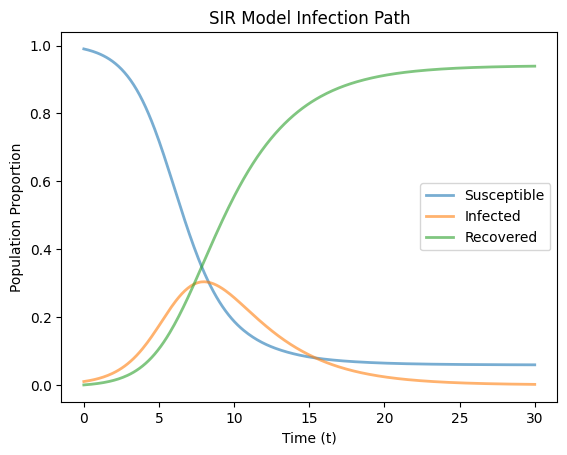

In [25]:
#Plot
fig, ax = plt.subplots()
ax.plot(t, sp.T, linewidth=2, alpha=0.6)
ax.legend(['Susceptible','Infected','Recovered'])
plt.title('SIR Model Infection Path')
plt.xlabel('Time (t)')
plt.ylabel('Population Proportion')
plt.show()

In [26]:
#Flatten the curve
betar = 0.6 #Reduce the contact rate

args2 = (betar, nu)
SIRprob2 = solve_ivp(SIR,tspan,y0,args=args2,dense_output=True)
SIRpath2 = SIRprob2.sol(t)

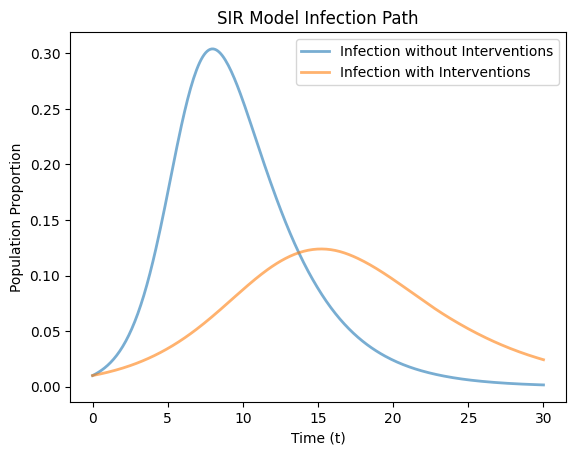

In [27]:
#Plot
fig, ax = plt.subplots()
ax.plot(t, sp[1,:].T, linewidth=2, alpha=0.6,label='Infection without Interventions')
ax.plot(t, SIRpath2[1,:].T, linewidth=2, alpha=0.6,label='Infection with Interventions')
ax.legend()
plt.title('SIR Model Infection Path')
plt.xlabel('Time (t)')
plt.ylabel('Population Proportion')
plt.show()